<a href="https://colab.research.google.com/github/ayushs0911/Projects/blob/main/Kaholas_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 84.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 24.8 MB/s eta 0:00:00


In [4]:
import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import re
import string
import time
from numpy import random
import gensim.downloader as api
from PIL import Image
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Dense,Flatten,InputLayer,BatchNormalization,Dropout,Input,LayerNormalization
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import (BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives,
                                       TrueNegatives, Precision, Recall, AUC, binary_accuracy,Accuracy,
                                       TopKCategoricalAccuracy, CategoricalAccuracy,SparseCategoricalAccuracy)
from tensorflow.keras.optimizers import Adam
from google.colab import drive
from google.colab import files
from datasets import load_dataset
from transformers import (BertTokenizerFast,TFBertTokenizer,BertTokenizer,RobertaTokenizerFast,
                          DataCollatorWithPadding,TFRobertaForSequenceClassification,TFBertForSequenceClassification,
                          TFBertModel,create_optimizer,TFDebertaForSequenceClassification,DebertaTokenizerFast)

In [16]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-ad84c8ae-5a57-f913-7fda-a182fc0cc460)


Downloading helper functions

In [17]:
import os 
if not os.path.exists('helper_functions.py'):
  !wget https://raw.githubusercontent.com/ayushs0911/Projects/main/helper_functions.py
else:
  print("[INFO] 'helper_functions.py' already exists.skipping download.")

[INFO] 'helper_functions.py' already exists.skipping download.


In [145]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, calculate_results, make_confusion_matrix

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/ayushs0911/Projects/main/Extras/bbc_news.csv')

In [6]:
data.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [7]:
headlines = data[['title']]

In [8]:
headlines

,title
0,Ukraine: Angry Zelensky vows to punish Russian...
1,War in Ukraine: Taking cover in a town under a...
2,Ukraine war 'catastrophic for global food'
3,Manchester Arena bombing: Saffie Roussos's par...
4,Ukraine conflict: Oil price soars to highest l...
...,...
15154,Antonio Conte: How 16 volatile months at Totte...
15155,Euro 2024 qualifiers: Northern Ireland 0-1 Fin...
15156,WSL highlights: Aston Villa 5-0 Leicester City
15157,Women's Premier League: Nat Sciver-Brunt helps...


In [9]:
for i in range(10):
  print (random.choice(headlines['title']))


Ethiopia's online horrors: 'I saw my father's dead body on Facebook'
Melisa Raouf: Going make-up free in the Miss England final
Kinder Scout mass trespass 'was a victory for ordinary people'
Ukraine war: 300 Ukrainians get visas via new scheme, says UK
Ukraine strikes Wagner HQ in Luhansk, governor says
I regret Williamson job ended in resignation, says Rishi Sunak
MOTD Analysis: How Aleksandar Mitrovic caused problems for Liverpool
Turning Red: Killing Eve's Sandra Oh on celebrating Pixar, puberty and periods
Cody Gakpo: Liverpool agree to sign forward, say PSV Eindhoven
General practice is like calling an Uber, MPs say


##Vader Sentiment 
https://vadersentiment.readthedocs.io/en/latest/index.html

In [32]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

**About the Scoring**<br>
The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a ‘normalized, weighted composite score’ is accurate.

It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values   are:

- positive sentiment: `compound score` >= 0.5
- neutral sentiment: (`compound score` > -0.5) and (`compound score` < 0.5)
- negative sentiment: `compound score` <= -0.5

The `pos`, `neu`, and `neg` scores are ratios for proportions of text that fall in each category (so these should all add up to be 1… or close to it with float operation). These are the most useful metrics if you want multidimensional measures of sentiment for a given sentence.

In [35]:
analyzer.polarity_scores('Boxing Day shoppers bounce back as footfall rises')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [36]:
analyzer.polarity_scores("Alabama man secretly helped pay strangers' prescriptions for years")

{'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'compound': -0.1027}

In [37]:
def vader_sentiment_result(sentance):
  scores = analyzer.polarity_scores(sentance)
  if scores['compound'] >= 0.5:
    return 'Positive'
  elif scores['compound'] <= -0.5:
    return 'Negative'
  else: 
    return 'Neutral'

In [38]:
for i in range(10):
  sent = random.choice(headlines['title'])
  print(f"Sentance : {sent} \n Label : {vader_sentiment_result(sentance = sent)}")

Sentance : Covid boosters: Who is being vaccinated? 
 Label : Neutral
Sentance : Pensions, savings and mortgages - your questions answered 
 Label : Neutral
Sentance : Colourful songbirds could be traded to extinction 
 Label : Neutral
Sentance : Could you quit your job to become a full-time activist? 
 Label : Neutral
Sentance : Commonwealth Games: Scots creator reveals secrets of metal bull 
 Label : Neutral
Sentance : Anteater rescued from wildfire by Bolivian firefighters 
 Label : Neutral
Sentance : Laura Winham death: Family battled privacy law as sister lay dead 
 Label : Negative
Sentance : World Cup 2022: Enner Valencia scores double as hosts lose opening game 
 Label : Neutral
Sentance : Jake Wightman could be most successful ever - Coe 
 Label : Positive
Sentance : Your pictures on the theme of 'into the blue' 
 Label : Neutral


In [39]:
headlines["Label"] = headlines['title'].apply(lambda x : vader_sentiment_result(x))


<ipython-input-39-908229143696>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headlines["Label"] = headlines['title'].apply(lambda x : vader_sentiment_result(x))


In [40]:
headlines.head()

,title,Label
0,Ukraine: Angry Zelensky vows to punish Russian...,Negative
1,War in Ukraine: Taking cover in a town under a...,Negative
2,Ukraine war 'catastrophic for global food',Negative
3,Manchester Arena bombing: Saffie Roussos's par...,Neutral
4,Ukraine conflict: Oil price soars to highest l...,Neutral


In [41]:
headlines['Label'].value_counts()

Neutral     11021
Negative     2608
Positive     1578
Name: Label, dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [43]:
headlines['Label']=le.fit_transform(headlines['Label'])
headlines


<ipython-input-43-dd9c452d30cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headlines['Label']=le.fit_transform(headlines['Label'])


,title,Label
0,Ukraine: Angry Zelensky vows to punish Russian...,0
1,War in Ukraine: Taking cover in a town under a...,0
2,Ukraine war 'catastrophic for global food',0
3,Manchester Arena bombing: Saffie Roussos's par...,1
4,Ukraine conflict: Oil price soars to highest l...,1
...,...,...
15202,Humza Yousaf: We will be the generation that d...,1
15203,Chris Mason: Old tensions to remain for SNP's ...,1
15204,How will Scotland's new first minister be appo...,1
15205,"Who is Humza Yousaf, the new SNP leader?",1


In [44]:
headlines['Label'].value_counts()

1    11021
0     2608
2     1578
Name: Label, dtype: int64

In [45]:
label_classes = {'Neutral' : 1,
                 'Negative': 0,
                 'Positive' : 2}

#Preparing Data for Modelling 

In [46]:
from datasets import Dataset
dataset = Dataset.from_pandas(headlines)

In [47]:
dataset

Dataset({
    features: ['title', 'Label'],
    num_rows: 15207
})

In [48]:
model_id="microsoft/deberta-base"
tokenizer = DebertaTokenizerFast.from_pretrained(model_id)

In [49]:
def tokenizer_function(dataset):
  return tokenizer(dataset["title"],)

In [50]:
tokenized_dataset = dataset.map(tokenizer_function)

Map:   0%|          | 0/15207 [00:00<?, ? examples/s]

In [51]:
tokenized_dataset

Dataset({
    features: ['title', 'Label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 15207
})

In [52]:
tokenized_dataset[4]

{'title': 'Ukraine conflict: Oil price soars to highest level since 2008',
 'Label': 1,
 'input_ids': [1,
  42724,
  3050,
  35,
  4541,
  425,
  98,
  2726,
  7,
  1609,
  672,
  187,
  2266,
  2],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [53]:
data_collator = DataCollatorWithPadding(tokenizer = tokenizer, return_tensors = 'tf')

In [54]:
tf_dataset = tokenized_dataset.to_tf_dataset(columns = ['input_ids', 'attention_mask', 'Label'],
                                             shuffle = True, 
                                             batch_size = 8,
                                             collate_fn = data_collator)

You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [55]:
def swap_positions(dataset):
  return {'input_ids' :dataset['input_ids'],
          'attention_mask' : dataset['attention_mask']}, dataset['Label']

In [56]:
tf_dataset = tf_dataset.map(swap_positions)

In [57]:
len(tf_dataset)

1901

In [58]:
def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
  DATASET_SIZE = len(dataset)

  train_dataset = dataset.take(int(TRAIN_RATIO * DATASET_SIZE))

  val_test_dataset = dataset.skip(int(TRAIN_RATIO * DATASET_SIZE))
  val_dataset = val_test_dataset.take(int(VAL_RATIO * DATASET_SIZE))
  
  test_dataset = val_test_dataset.skip(int(VAL_RATIO * DATASET_SIZE))

  return train_dataset, val_dataset, test_dataset

In [59]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

train_dataset, val_dataset, test_dataset = splits(tf_dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO)

In [60]:
len(train_dataset), len(val_dataset), len(test_dataset)

(1520, 190, 191)

In [61]:
for i in val_dataset.take(1):
  print(i)

({'input_ids': <tf.Tensor: shape=(8, 24), dtype=int64, numpy=
array([[    1, 23818,  4822,  2058,  1680,    58,    45,   303,    13,
         4059,   722,   111,   249,     2,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    1,   510,   879,   267, 10810,  1063,  4759,    35,  1752,
          370,   565, 17968, 10854,  5110,  1232,  3462,    30, 34255,
            2,     0,     0,     0,     0,     0],
       [    1, 12444,  1210,    35,  2615,    47,   645,   209,  2275,
          815,   950, 14506,    31,     5,   375,   389,   107,   116,
            2,     0,     0,     0,     0,     0],
       [    1,   347,  1417,   808,    12,  1646,    11,     5,   987,
           35,  1336,   171, 34377,  1469, 19473,  1200,    32,    89,
           11,   127,   443,   116,     2,     0],
       [    1,   534,  4712,   385,   108,   243,  6956,    35,   344,
         1439, 15404,   607,    16,    78,  2059,     7,   339,   272,
         4712,   385,   

#Modelling and Training

##*TFDebertaForSequenceClassification*

In [62]:
model_deberta_for_sqs = TFDebertaForSequenceClassification.from_pretrained(model_id, num_labels = 3)
model_deberta_for_sqs.summary()

All model checkpoint layers were used when initializing TFDebertaForSequenceClassification.

Some layers of TFDebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler', 'classifier', 'cls_dropout']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_deberta_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 deberta (TFDebertaMainLayer  multiple                 138601728 
 )                                                               
                                                                 
 pooler (TFDebertaContextPoo  multiple                 590592    
 ler)                                                            
                                                                 
 cls_dropout (TFDebertaStabl  multiple                 0         
 eDropout)                                                       
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 139,194,627
Trainable params: 139,194,627
Non-trainable params: 0
______________

In [63]:
checkpoint_path = "model_checkpoints/cp.ckpt" # saving weights requires ".ckpt" extension
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy", # save the model weights with best validation accuracy
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True, # only save model weights (not whole model)
                                                      verbose=0) # don't print out whether or not model is being saved

In [64]:
num_epochs = 3

batches_per_epoch = len(tokenized_dataset["title"]) // 8 #batch_size
total_train_steps = int(batches_per_epoch * num_epochs)

In [65]:
optimizer, schedule = create_optimizer(init_lr=2e-5,
                                       num_warmup_steps=0, 
                                       num_train_steps=total_train_steps)

In [66]:
model_deberta_for_sqs.compile(optimizer=optimizer,
    metrics=["accuracy"])

No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


In [67]:
history_sqs_cls = model_deberta_for_sqs.fit( train_dataset,
                                            validation_data=val_dataset,
                                            epochs=3,
                                            callbacks = [model_checkpoint,
                                                         create_tensorboard_callback ('training_logs', 
                                                                                      'bert_for_sqs_classification')])

Saving TensorBoard log files to: training_logs/bert_for_sqs_classification/20230328-110219
Epoch 1/3


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


1520/1520 [==============================] - 398s 202ms/step - loss: 0.4007 - accuracy: 0.8463 - val_loss: 0.3214 - val_accuracy: 0.8651
Epoch 2/3
1520/1520 [==============================] - 291s 191ms/step - loss: 0.2109 - accuracy: 0.9225 - val_loss: 0.1045 - val_accuracy: 0.9697
Epoch 3/3
1520/1520 [==============================] - 282s 185ms/step - loss: 0.1188 - accuracy: 0.9590 - val_loss: 0.0380 - val_accuracy: 0.9908


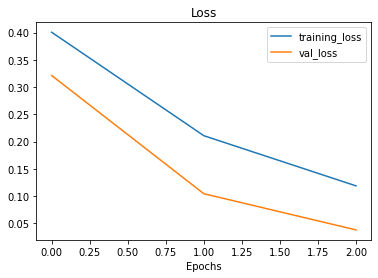

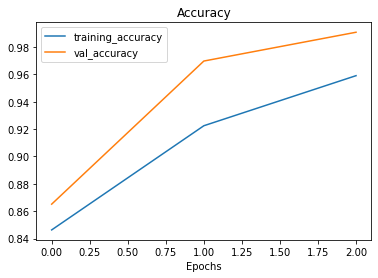

In [78]:
plot_loss_curves(history_sqs_cls)

In [112]:
predicted = []
labels = []

for input, label in val_dataset:
  predicted.append(model_deberta_for_sqs(**input).logits)
  labels.append(label)

In [104]:
predicted[:10]

[<tf.Tensor: shape=(8, 3), dtype=float32, numpy=
 array([[ 4.425459  , -0.3886328 , -3.4575565 ],
        [-1.3165693 ,  3.721723  , -3.4216022 ],
        [ 4.8923182 , -0.9820054 , -3.1773515 ],
        [-2.7337246 ,  3.430791  , -1.9199395 ],
        [-3.5967603 ,  3.9474854 , -1.6647133 ],
        [ 4.282761  , -0.41201988, -3.5493712 ],
        [-3.36516   ,  4.338385  , -2.1827717 ],
        [ 4.302723  ,  0.20780253, -4.0485687 ]], dtype=float32)>,
 <tf.Tensor: shape=(8, 3), dtype=float32, numpy=
 array([[-3.245632  ,  4.3177724 , -2.135203  ],
        [-3.3013198 ,  4.596117  , -2.2814045 ],
        [ 4.7868423 , -1.2924457 , -3.073067  ],
        [-0.46320164,  3.2421556 , -3.3770769 ],
        [-3.6994581 , -0.7582136 ,  4.5083466 ],
        [-3.975734  ,  2.6380682 ,  0.72293997],
        [ 2.483432  ,  1.6116167 , -3.865792  ],
        [-3.563272  ,  4.0309515 , -1.891753  ]], dtype=float32)>,
 <tf.Tensor: shape=(8, 3), dtype=float32, numpy=
 array([[ 4.642749  , -0.6920611 

In [140]:
labels = np.array(labels).flatten()

In [141]:
preds = tf.argmax(predicted, axis = -1).numpy().flatten()

In [143]:
preds.shape, labels.shape

((1520,), (1520,))

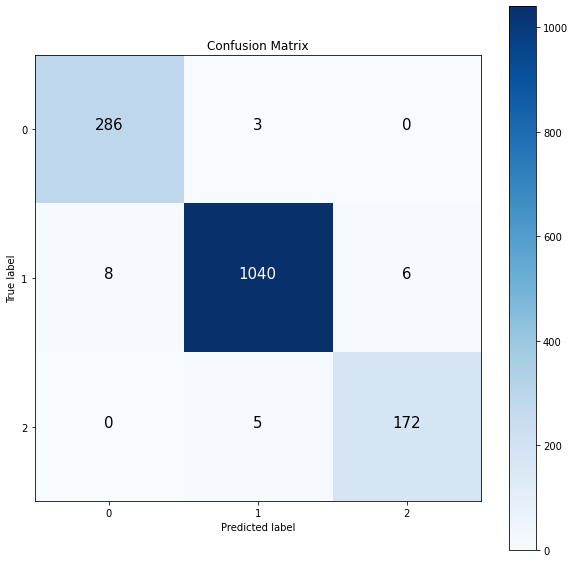

In [146]:
make_confusion_matrix(y_true = labels, 
                      y_pred = preds)

In [152]:
calculate_results(labels, preds)

{'accuracy': 98.55263157894737,
 'precision': 0.9856078689211971,
 'recall': 0.9855263157894737,
 'f1': 0.9855468842770605}

##Evaluating on Test Dataset. 

In [148]:
model_deberta_for_sqs.evaluate(test_dataset)

191/191 [==============================] - 24s 104ms/step - loss: 0.0533 - accuracy: 0.9849


[0.053282443434000015, 0.9849377870559692]